# Exercises



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix,ConfusionMatrixDisplay
from acquire import get_titanic_data
from prepare import prep_titanic
%matplotlib inline
%config InlineBackend.figure_format = 'retina'




Using the titanic data, in your classification-exercises repository, create a notebook, `model.ipynb` where you will do the following:



In [2]:
titanic_df = get_titanic_data()
train,validate,test = prep_titanic(titanic_df)
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             498 non-null    int64  
 1   survived                 498 non-null    int64  
 2   pclass                   498 non-null    int64  
 3   age                      498 non-null    float64
 4   sibsp                    498 non-null    int64  
 5   parch                    498 non-null    int64  
 6   fare                     498 non-null    float64
 7   alone                    498 non-null    int64  
 8   sex_female               498 non-null    uint8  
 9   sex_male                 498 non-null    uint8  
 10  embark_town_Cherbourg    498 non-null    uint8  
 11  embark_town_Queenstown   498 non-null    uint8  
 12  embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(6), uint8(5)
memory usage: 37.4 KB


1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.



In [3]:
#baseline prediction
x = ['fare','sex_male','sex_female','pclass','age']
y = 'survived' #so chosen because I need to do something different to enjoy this
# Baseline accuracy: accuracy
x_train = train[x]
y_train = train[y]

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



[Text(0.5307017543859649, 0.9375, 'sex_female <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = male'),
 Text(0.2817982456140351, 0.8125, 'fare <= 18.275\ngini = 0.295\nsamples = 323\nvalue = [265, 58]\nclass = male'),
 Text(0.11403508771929824, 0.6875, 'age <= 7.835\ngini = 0.184\nsamples = 205\nvalue = [184, 21]\nclass = male'),
 Text(0.09649122807017543, 0.5625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = female'),
 Text(0.13157894736842105, 0.5625, 'fare <= 13.25\ngini = 0.17\nsamples = 203\nvalue = [184, 19]\nclass = male'),
 Text(0.11403508771929824, 0.4375, 'fare <= 12.637\ngini = 0.183\nsamples = 187\nvalue = [168, 19]\nclass = male'),
 Text(0.07017543859649122, 0.3125, 'age <= 32.5\ngini = 0.163\nsamples = 168\nvalue = [153, 15]\nclass = male'),
 Text(0.03508771929824561, 0.1875, 'age <= 29.839\ngini = 0.188\nsamples = 133\nvalue = [119, 14]\nclass = male'),
 Text(0.017543859649122806, 0.0625, 'gini = 0.168\nsamples = 119\nvalue = [108, 11]\nclass = male')

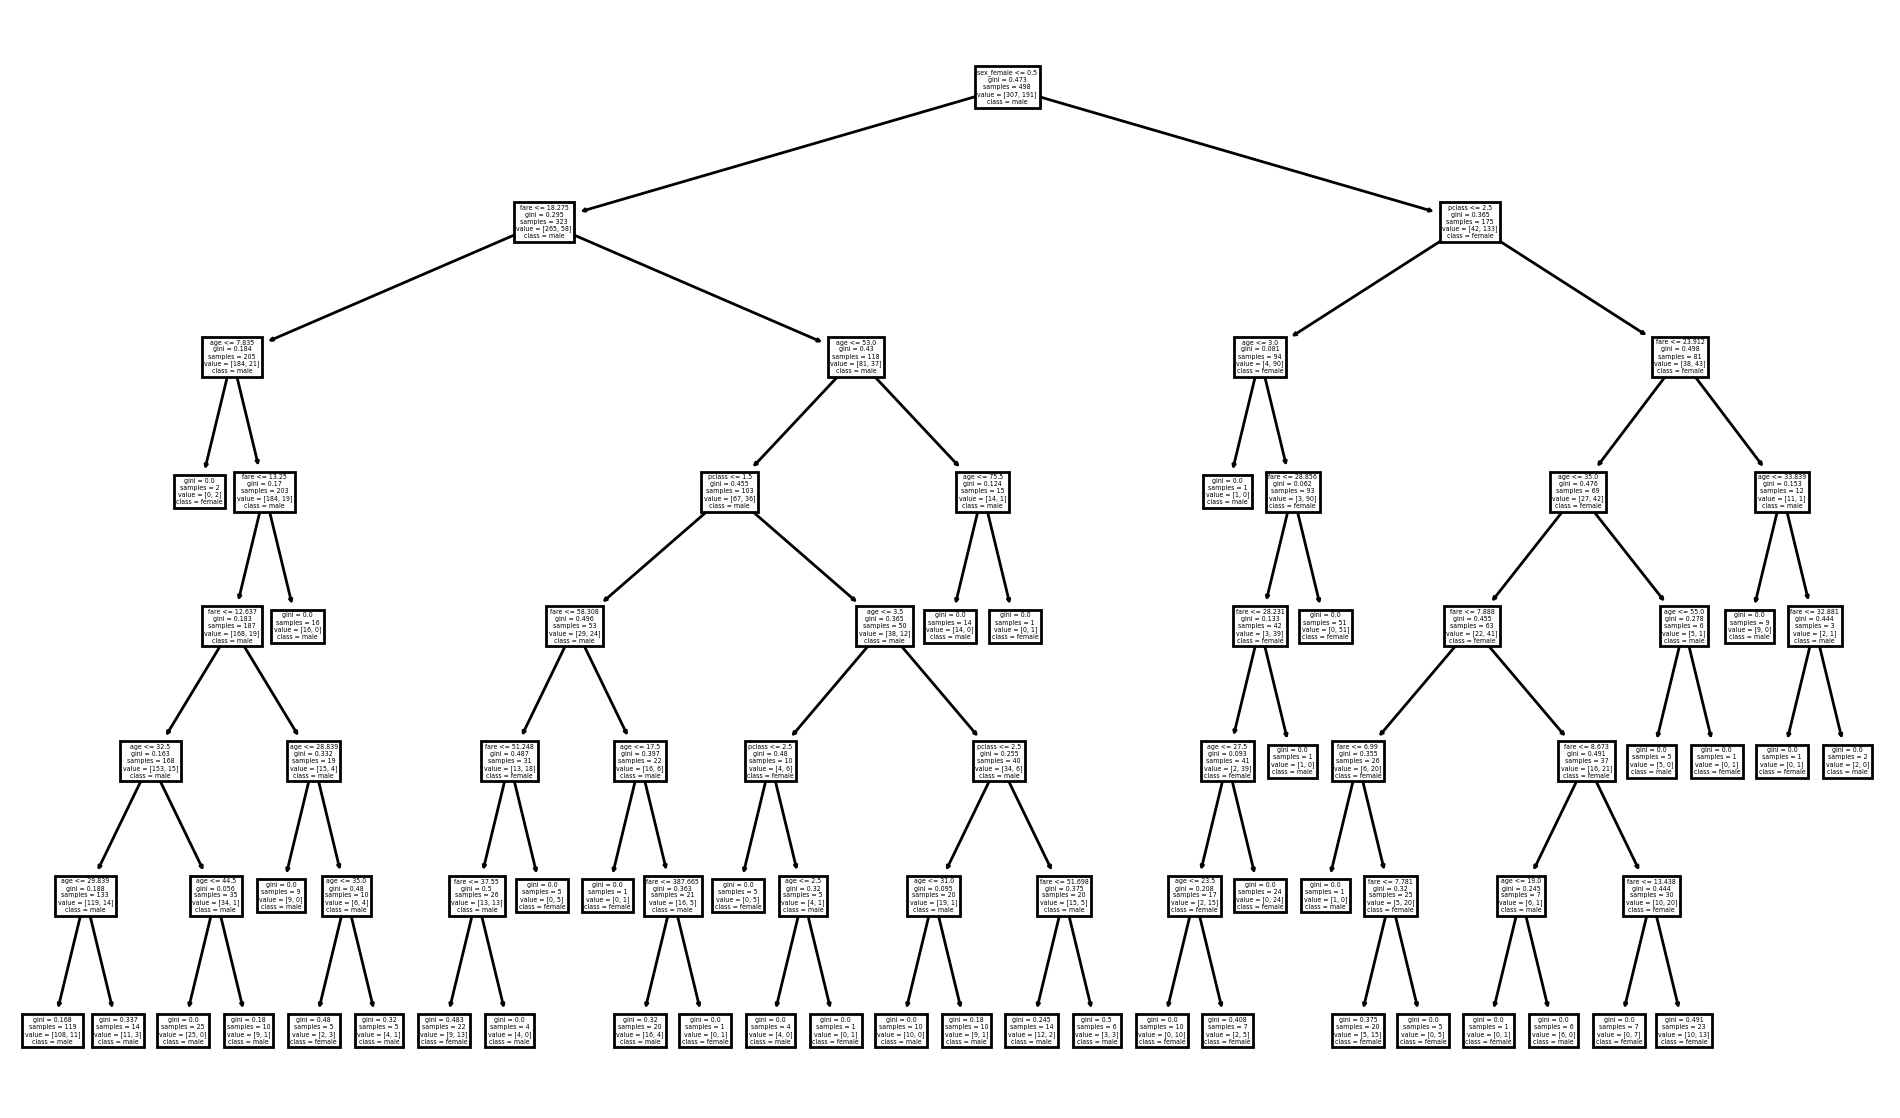

In [4]:
tree = DecisionTreeClassifier(max_depth=7)
tree.fit(x_train,y_train)
plt.figure(figsize=(12,7))
predicted = tree.predict(train[x])
plot_tree(tree,feature_names=x_train.columns,class_names=['male','female'])

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.



array([[279,  28],
       [ 26, 165]])

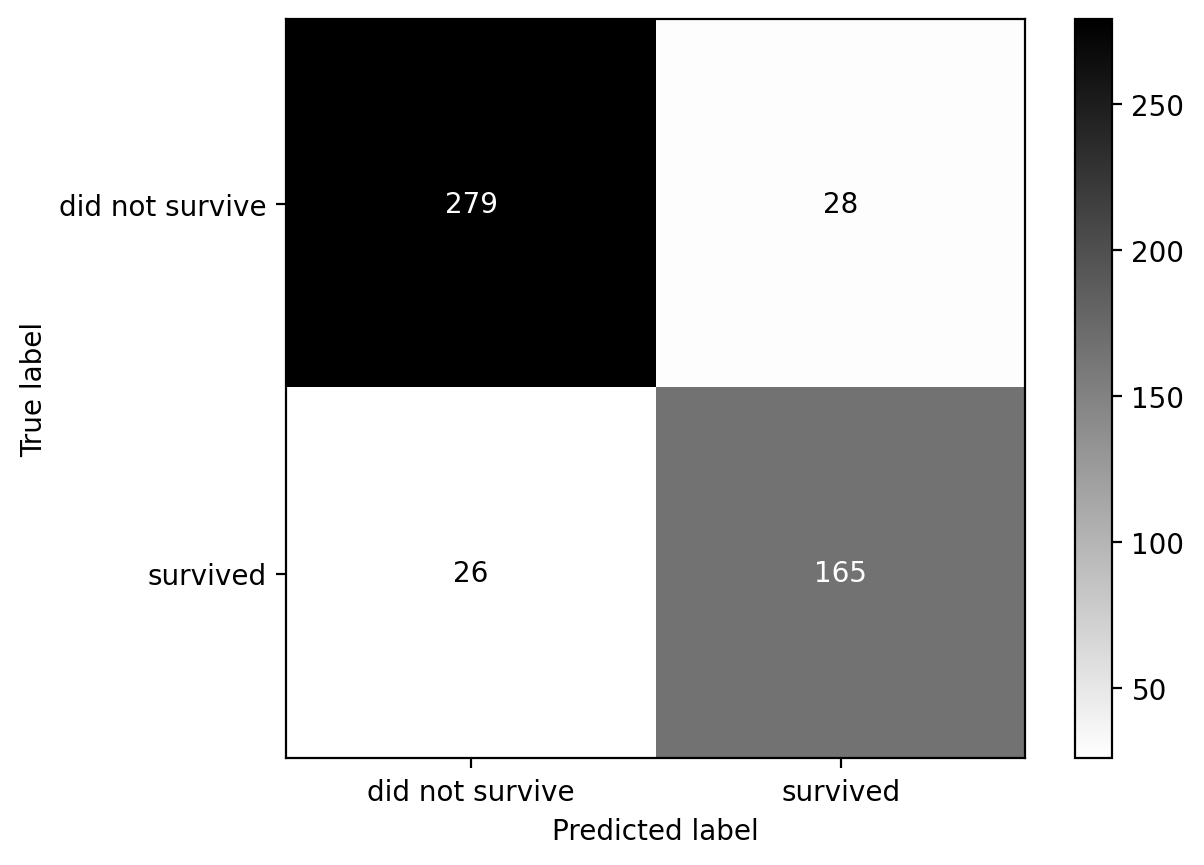

In [5]:

confusion_disp = ConfusionMatrixDisplay.from_predictions(y_train,predicted,display_labels=['did not survive','survived'],cmap='binary')
confusion = confusion_disp.confusion_matrix
confusion

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [6]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train,predicted)
print(classification_report(y_train,predicted))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       307
           1       0.85      0.86      0.86       191

    accuracy                           0.89       498
   macro avg       0.88      0.89      0.89       498
weighted avg       0.89      0.89      0.89       498



5. Run through steps 2-4 using a different max_depth value.



[Text(0.5, 0.8333333333333334, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = male'),
 Text(0.25, 0.5, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = female'),
 Text(0.125, 0.16666666666666666, 'gini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = female'),
 Text(0.375, 0.16666666666666666, 'gini = 0.498\nsamples = 81\nvalue = [38, 43]\nclass = female'),
 Text(0.75, 0.5, 'fare <= 18.275\ngini = 0.295\nsamples = 323\nvalue = [265, 58]\nclass = male'),
 Text(0.625, 0.16666666666666666, 'gini = 0.184\nsamples = 205\nvalue = [184, 21]\nclass = male'),
 Text(0.875, 0.16666666666666666, 'gini = 0.43\nsamples = 118\nvalue = [81, 37]\nclass = male')]

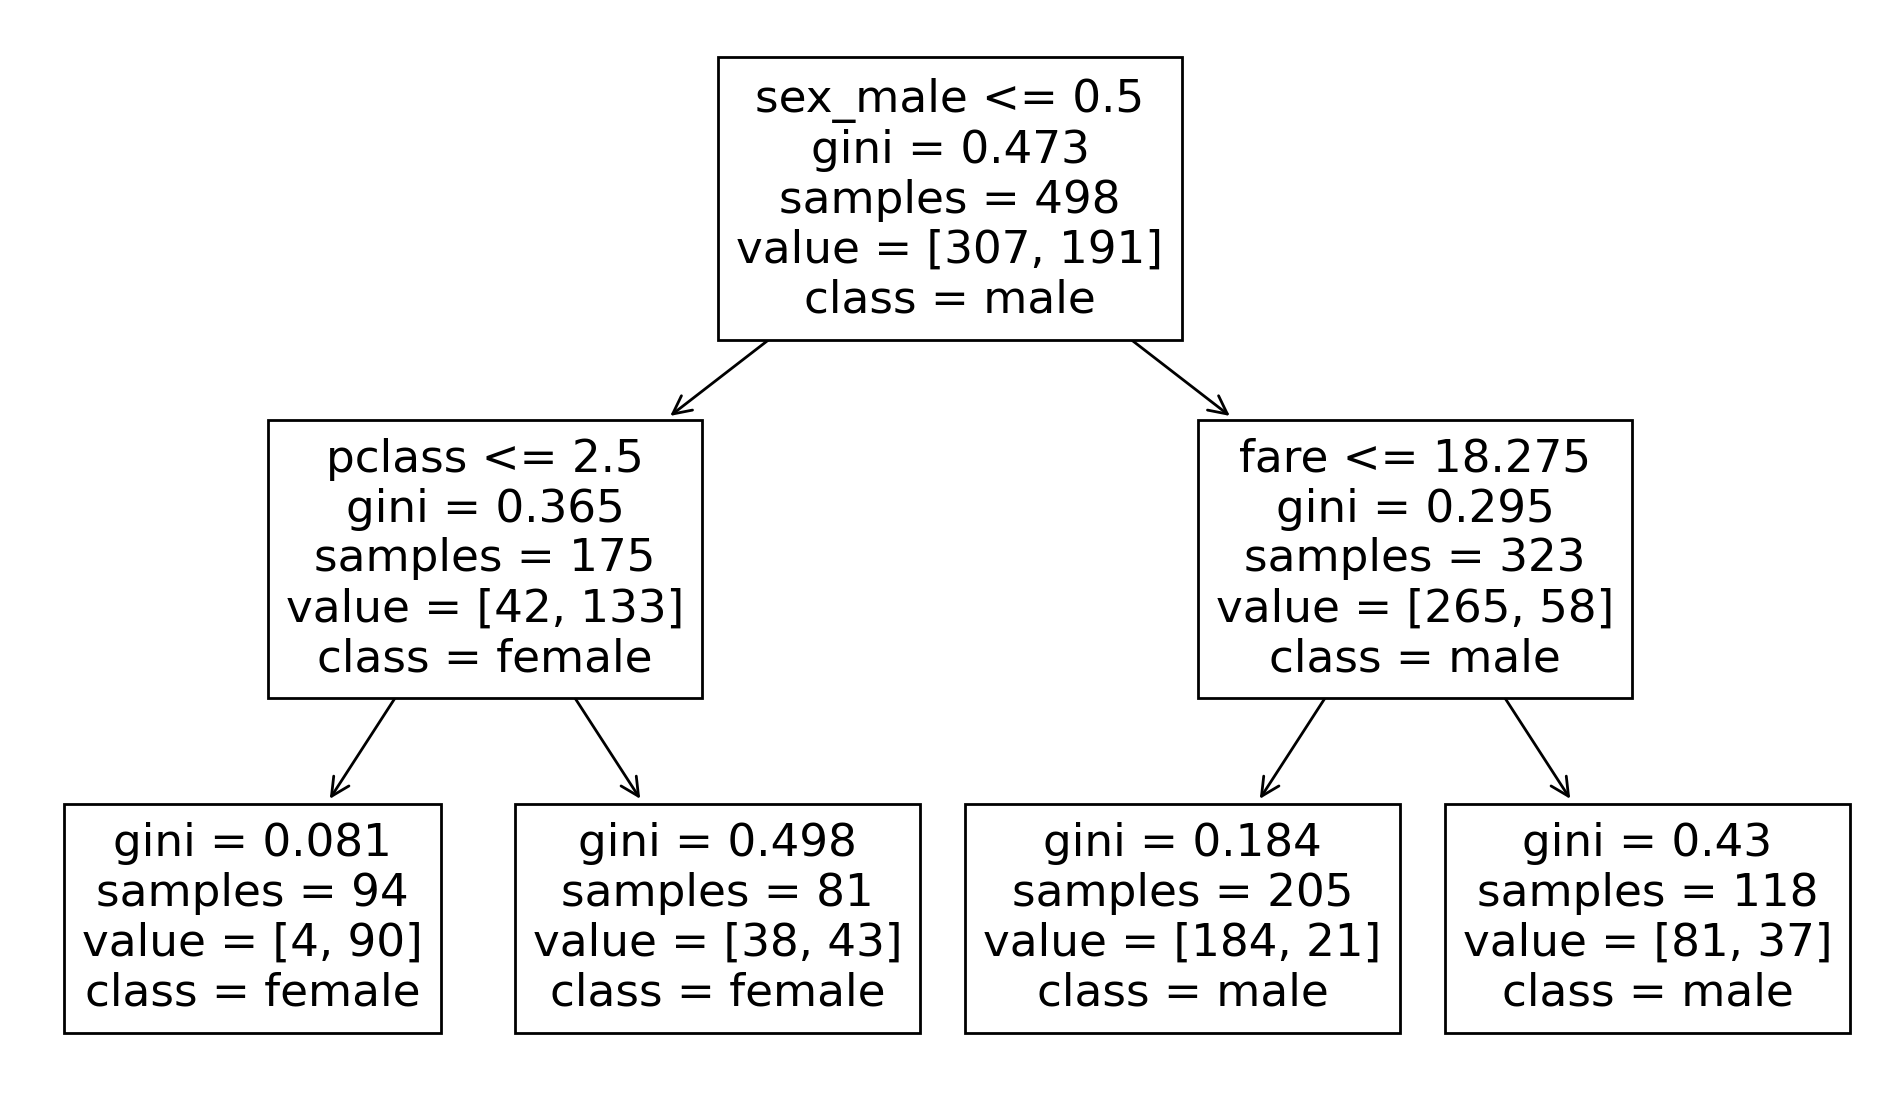

In [7]:
tree_2 = DecisionTreeClassifier(max_depth=2)
tree_2.fit(x_train,y_train)
plt.figure(figsize=(12,7))
predicted = tree_2.predict(train[x])
plot_tree(tree_2,feature_names=x_train.columns,class_names=['male','female'])

array([[265,  42],
       [ 58, 133]])

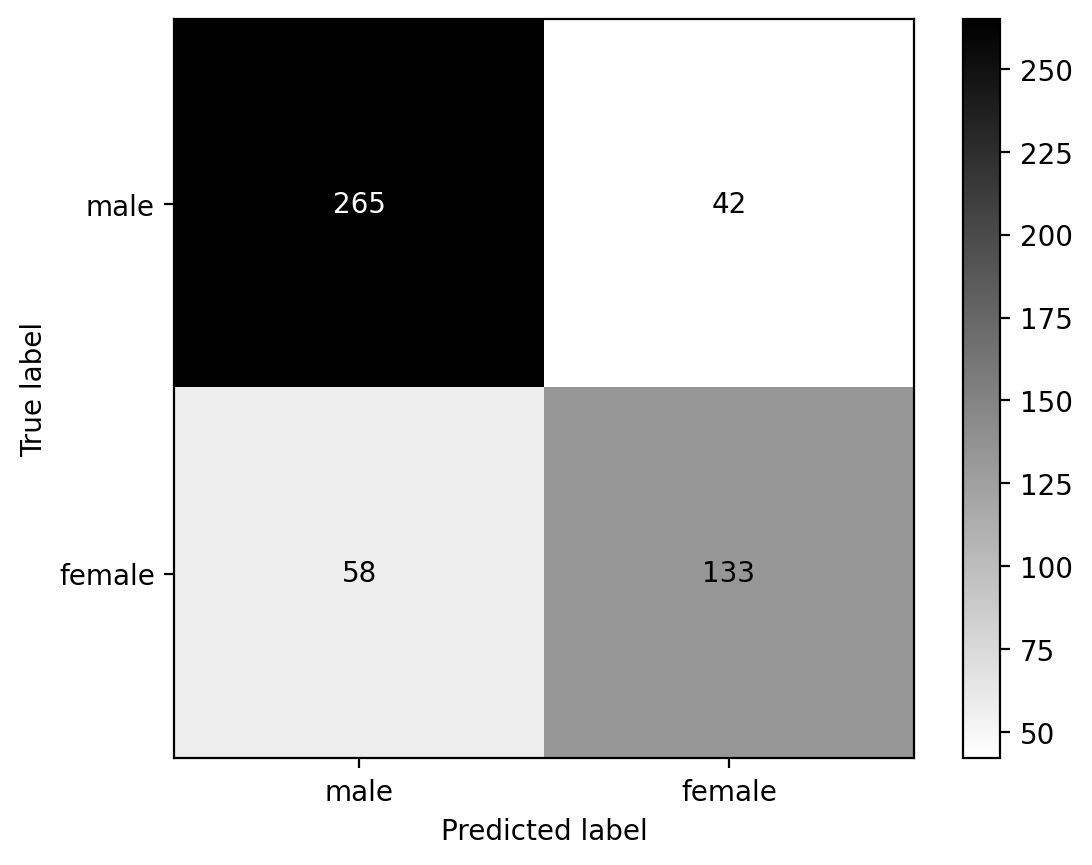

In [8]:

confusion_disp = ConfusionMatrixDisplay.from_predictions(y_train,predicted,display_labels=['male','female'],cmap='binary')
confusion = confusion_disp.confusion_matrix
confusion

In [9]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train,predicted)
print(classification_report(y_train,predicted))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.76      0.70      0.73       191

    accuracy                           0.80       498
   macro avg       0.79      0.78      0.78       498
weighted avg       0.80      0.80      0.80       498



6. Which model performs better on your in-sample data?

The first model (with greater depth) performs better...by one prediction

7. Which model performs best on your out-of-sample data, the validate set?



In [10]:
x_validate = validate[x]
y_validate = validate[y]


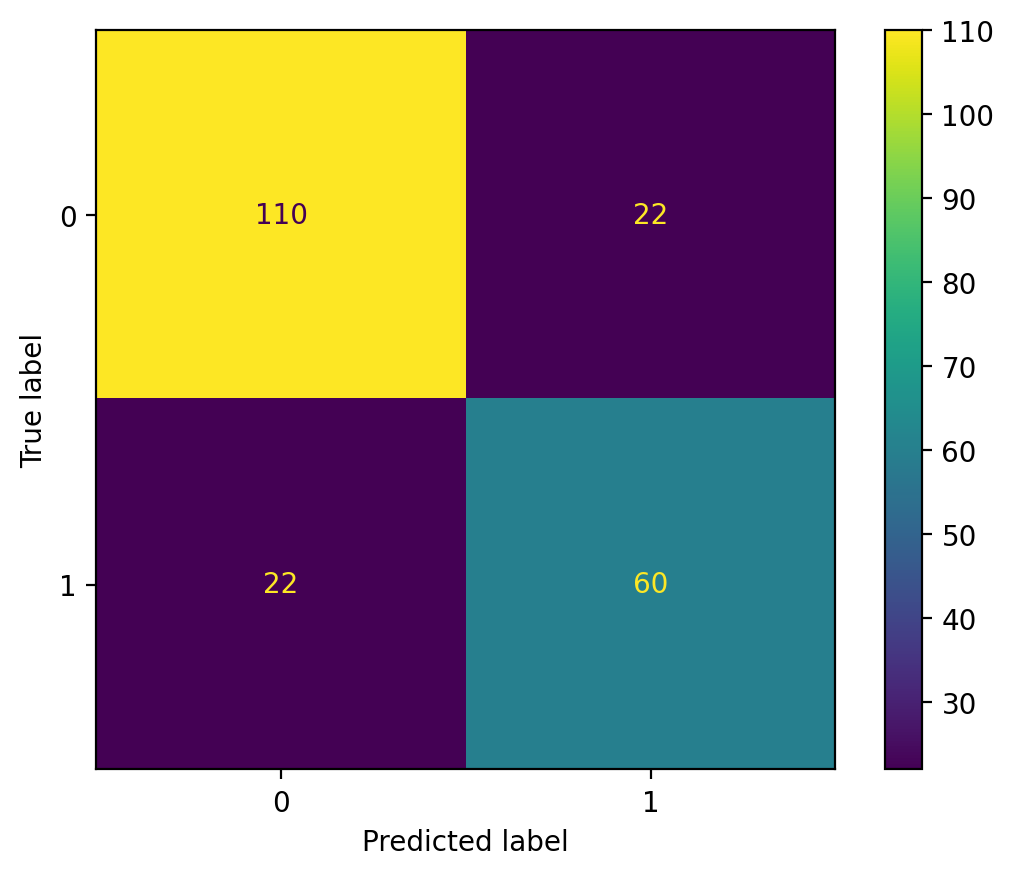

In [11]:
validate_predict = tree.predict(x_validate)
validate_confusion = ConfusionMatrixDisplay.from_predictions(y_validate,validate_predict)

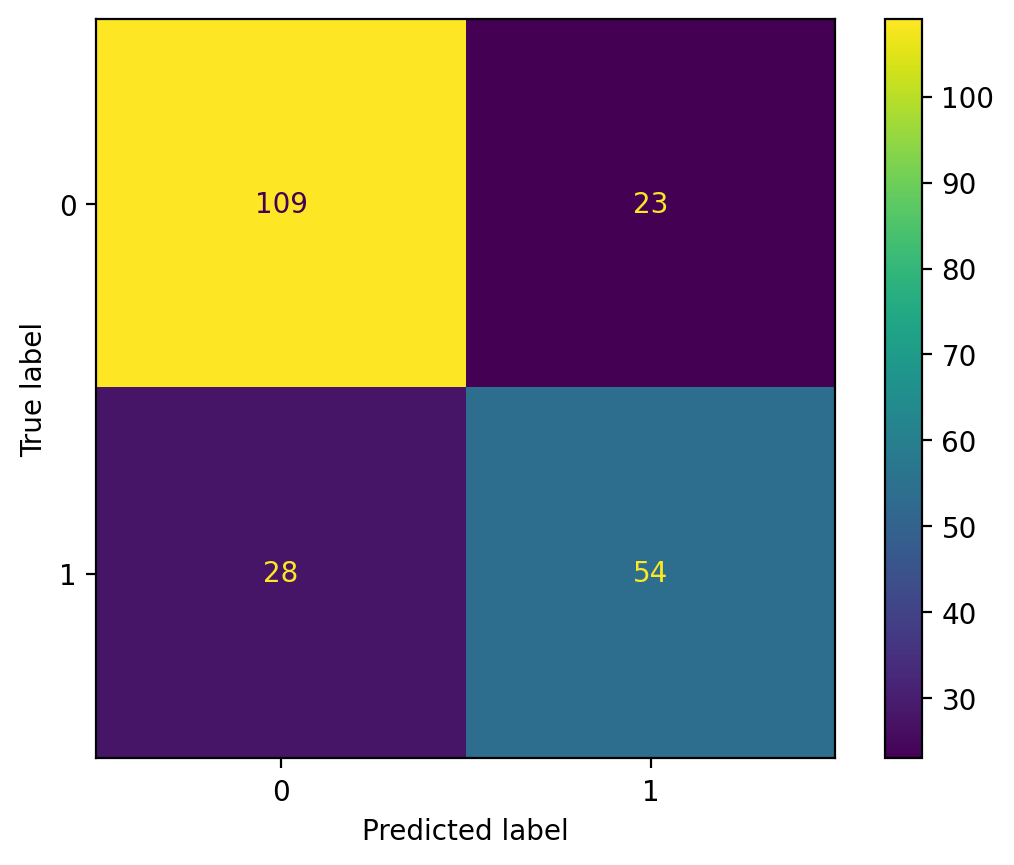

In [12]:
validate_2 = tree_2.predict(x_validate)
ConfusionMatrixDisplay.from_predictions(y_validate,validate_2)

8. Work through these same exercises using the Telco dataset.


# Random Forest
## Exercises

Continue working in your `model` file with titanic data to do the following: 

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.



In [13]:
from sklearn.ensemble import RandomForestClassifier

<BarContainer object of 5 artists>

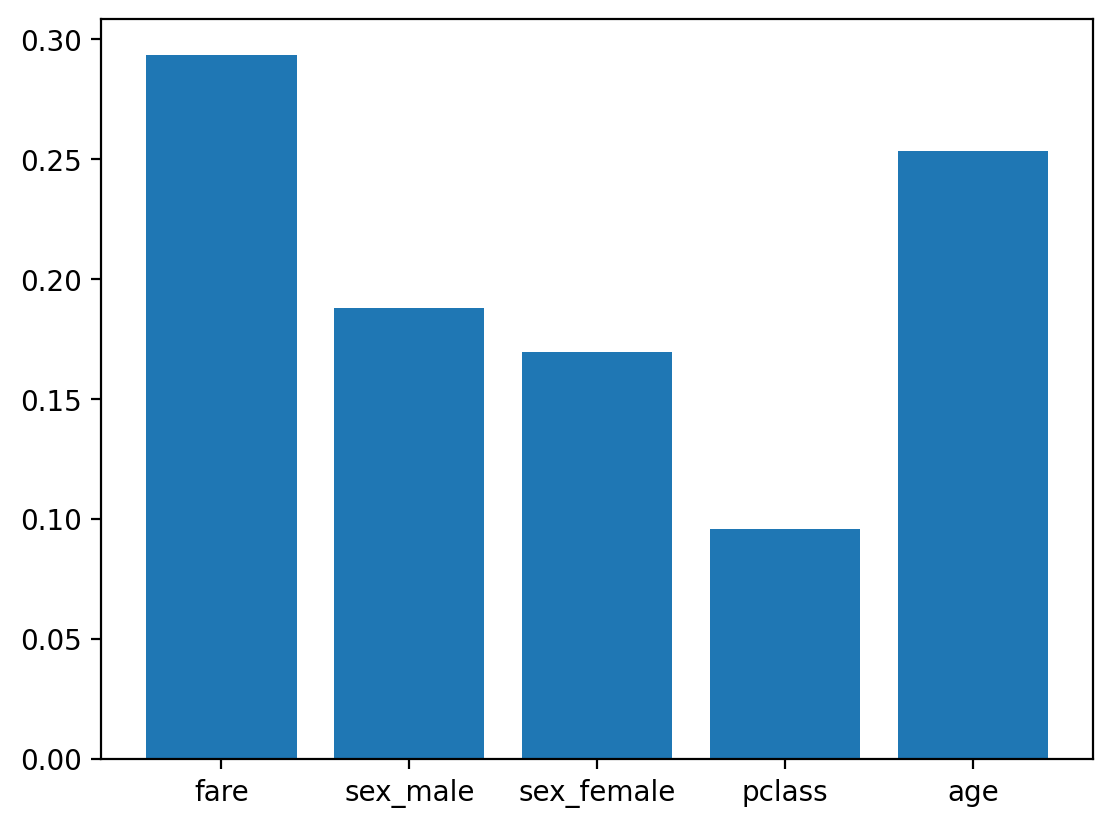

In [14]:
rf1 = RandomForestClassifier(min_samples_leaf=1,max_depth=10,random_state=69)
rf1.fit(x_train,y_train)
plt.bar(x_train.columns,rf1.feature_importances_)

2. Evaluate your results using the model score, confusion matrix, and classification report.



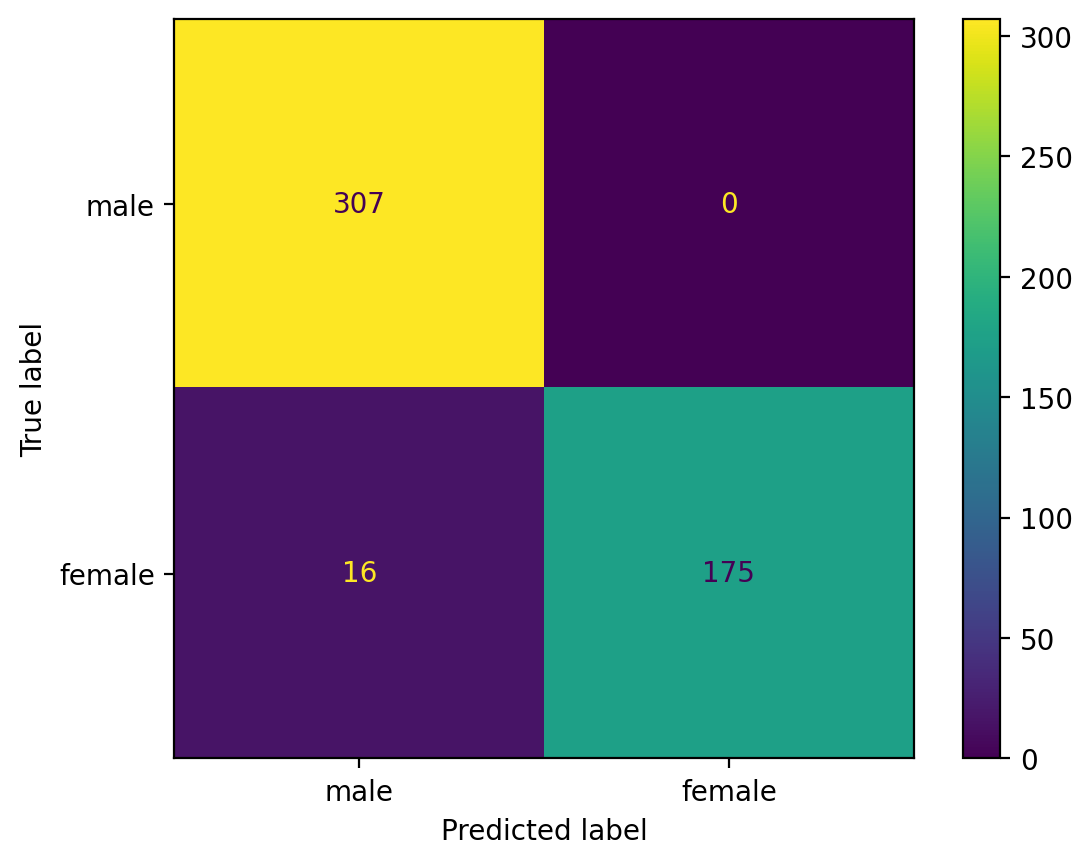

In [15]:
predictions = rf1.predict(x_train)
ConfusionMatrixDisplay.from_predictions(y_train,predictions,display_labels=['male','female'])

## TODO
1. Print and clearly label the following:  Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

1. Run through steps increasing your min_samples_leaf and decreasing your max_depth. 

1. What are the differences in the evaluation metrics?  Which performs better on your in-sample data?  Why?

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

Continue working in your model file with the titanic dataset.

Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

Evaluate your results using the model score, confusion matrix, and classification report.

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 setting k to 10

Run through steps 2-4 setting k to 20

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

Which model performs best on our out-of-sample data from validate?

/usr/local/anaconda3/envs/codeup/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


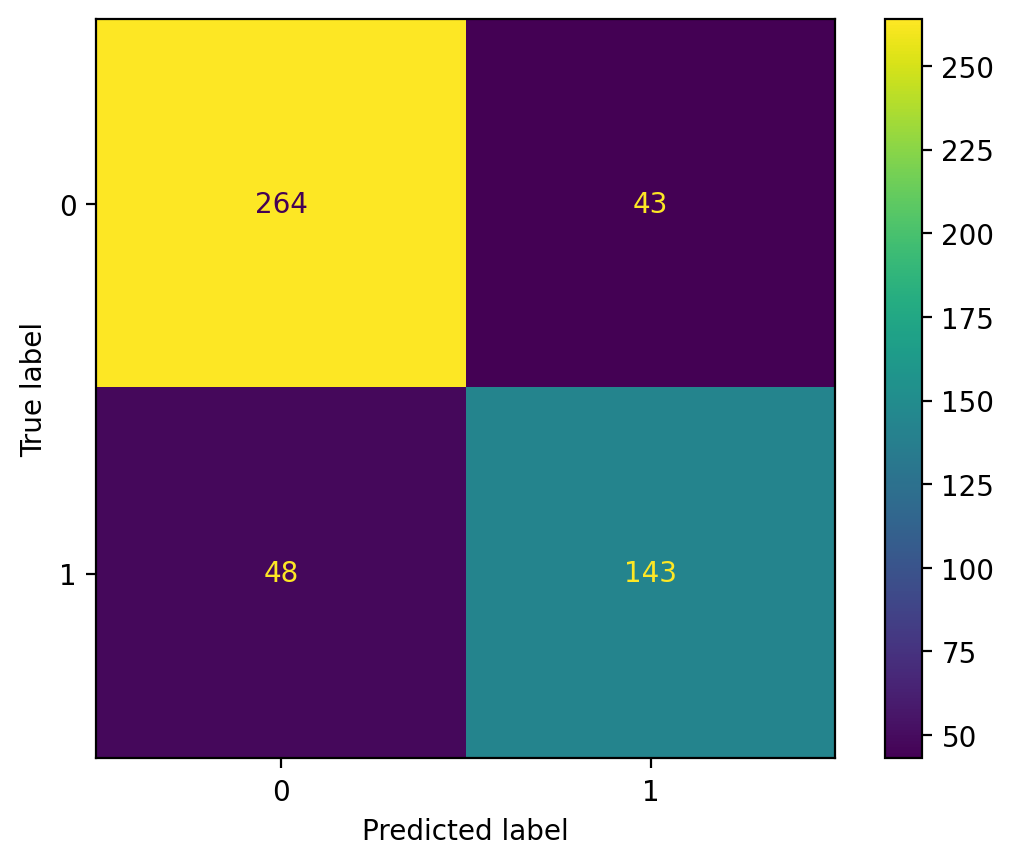

In [16]:

from sklearn.neighbors import KNeighborsClassifier
train, validate, test = prep_titanic(get_titanic_data(),True)
x_train = train.drop(columns=['parch','sibsp','passenger_id','sex_male'])
y_train = train['survived']
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predicted = knn.predict(x_train)
ConfusionMatrixDisplay.from_predictions(y_train,predicted)

In [17]:
print(f'accuracy rate of KNN: {knn.score(x_train, y_train)}')

print(classification_report(y_train, predicted))


accuracy rate of KNN: 0.8172690763052208
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       307
           1       0.77      0.75      0.76       191

    accuracy                           0.82       498
   macro avg       0.81      0.80      0.81       498
weighted avg       0.82      0.82      0.82       498



/usr/local/anaconda3/envs/codeup/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


/usr/local/anaconda3/envs/codeup/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


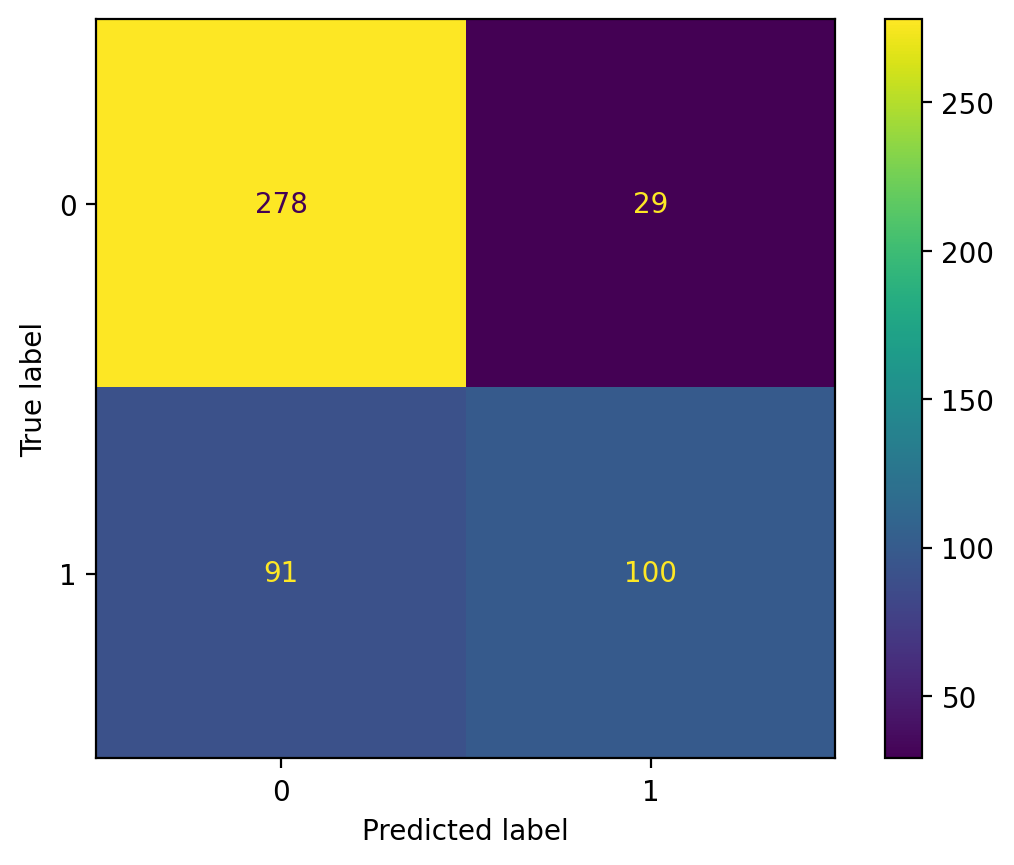

In [18]:

knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(x_train,y_train)
predicted2 = knn2.predict(x_train)
ConfusionMatrixDisplay.from_predictions(y_train,predicted2)

In [19]:
print(f'accuracy rate of KNN: {knn2.score(x_train, y_train)}')

print(classification_report(y_train, predicted))


accuracy rate of KNN: 0.7590361445783133
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       307
           1       0.77      0.75      0.76       191

    accuracy                           0.82       498
   macro avg       0.81      0.80      0.81       498
weighted avg       0.82      0.82      0.82       498



/usr/local/anaconda3/envs/codeup/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


/usr/local/anaconda3/envs/codeup/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


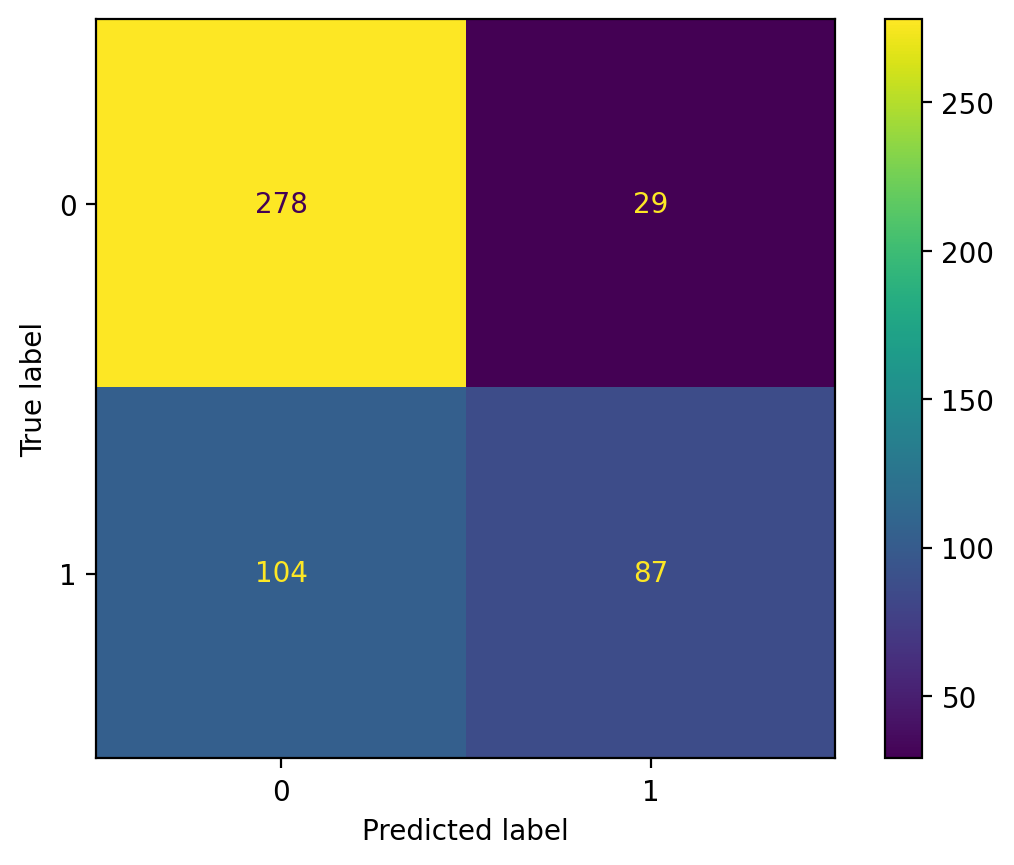

In [20]:

knn3 = KNeighborsClassifier(n_neighbors=20)
knn3.fit(x_train,y_train)
predicted = knn3.predict(x_train)
ConfusionMatrixDisplay.from_predictions(y_train,predicted)

In [21]:
print(f'accuracy rate of KNN: {knn3.score(x_train, y_train)}')

print(classification_report(y_train, predicted))


accuracy rate of KNN: 0.7329317269076305
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       307
           1       0.75      0.46      0.57       191

    accuracy                           0.73       498
   macro avg       0.74      0.68      0.69       498
weighted avg       0.74      0.73      0.71       498



/usr/local/anaconda3/envs/codeup/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [22]:
from sklearn.linear_model import LogisticRegression
import typing





In [23]:
baseline = train[train.survived == 0].survived.count() / train.survived.count()
baseline

0.6164658634538153

0    323
1    175
dtype: int64

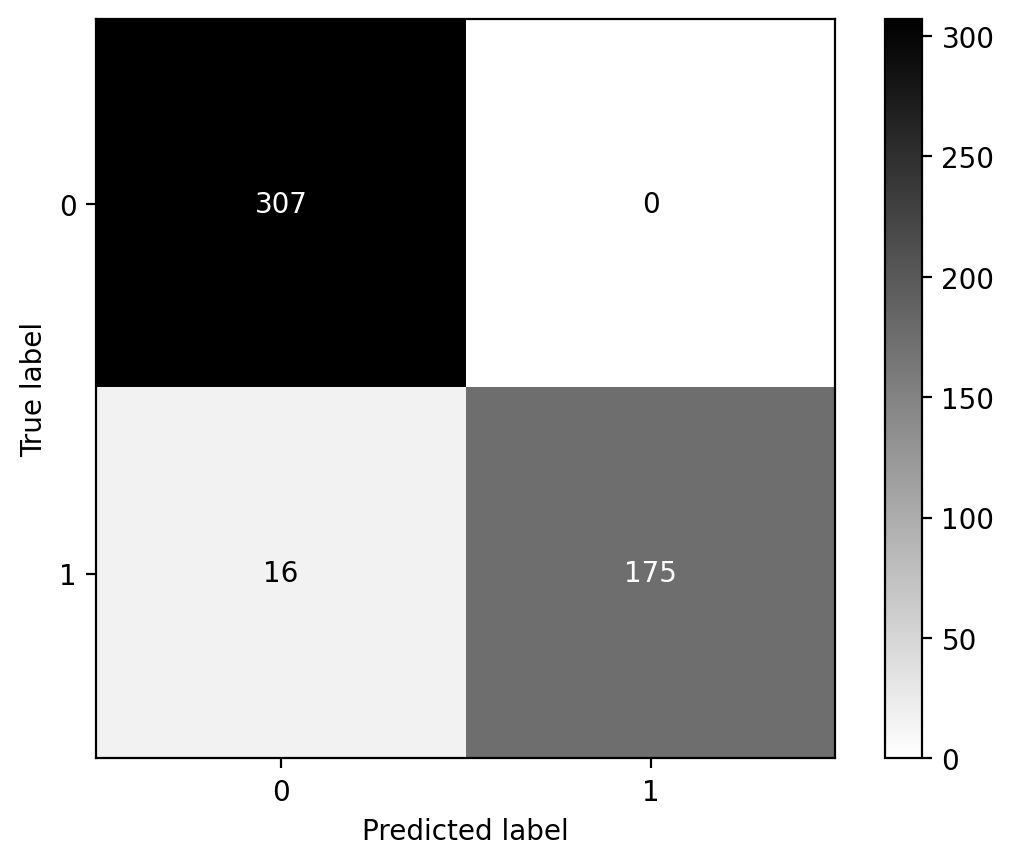

In [24]:
features1 = ['pclass', 'age', 'fare']
target = 'survived'
loggins1 = LogisticRegression()
xtrain = train[features1]
ytrain = train[target]
loggins1.fit(xtrain,ytrain)
predictions1 = loggins1.predict(xtrain)
ConfusionMatrixDisplay.from_predictions(y_train, predictions,cmap='binary')
pd.Series(predictions).value_counts()

0.8132530120481928

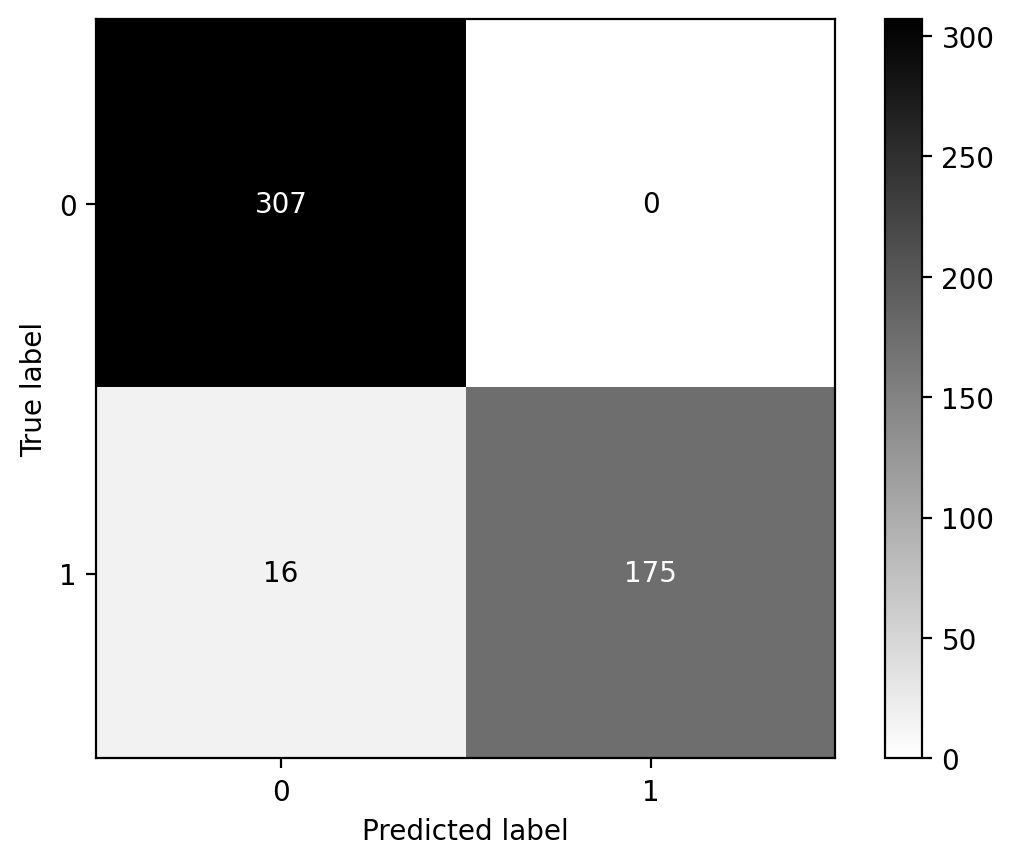

In [28]:
train, validate,test = prep_titanic(titanic_df,True)
xtrain2 = train[['age','fare','pclass','sex_male']]
loggins2 = LogisticRegression()
loggins2.fit(xtrain2,ytrain)
predictions2 = loggins2.predict(xtrain2)
ConfusionMatrixDisplay.from_predictions(y_train,predictions,cmap='binary')
loggins2.score(xtrain2,ytrain)

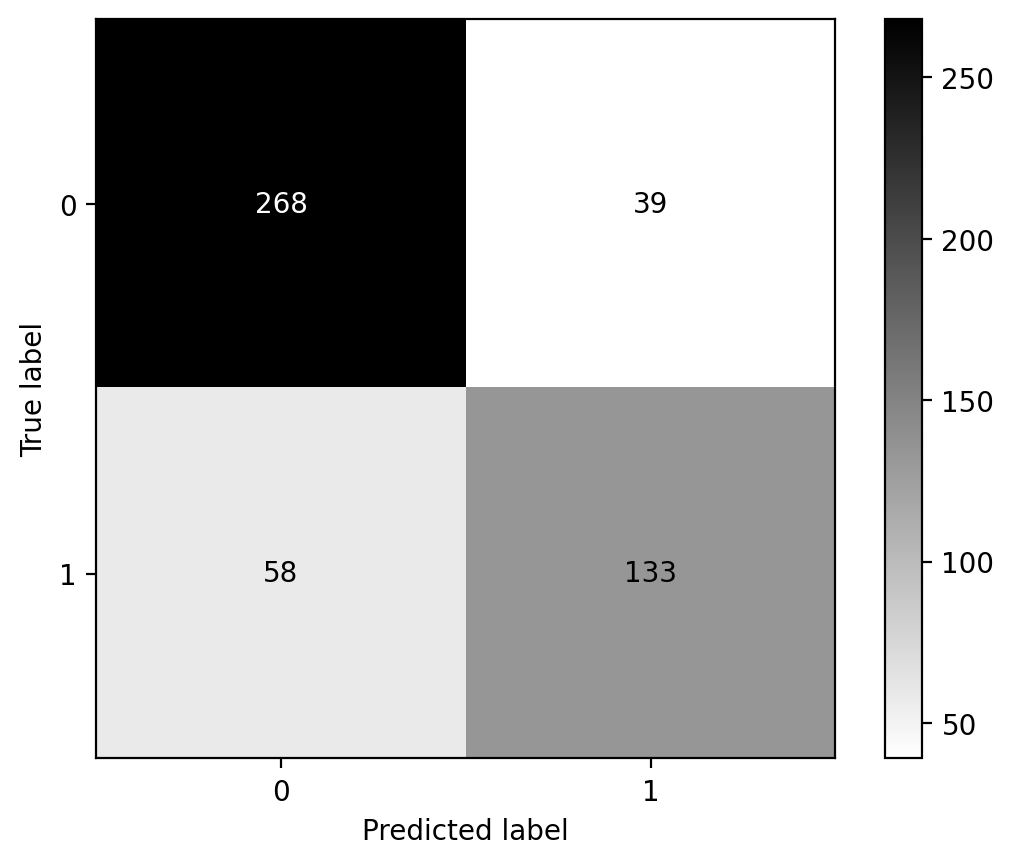

In [47]:
xtrain3 = train[['sex_male','sibsp','parch']]
loggins3 = LogisticRegression(C=1.4,random_state=69)
loggins3.fit(xtrain3,ytrain)
predictions3 = loggins3.predict(xtrain3)
ConfusionMatrixDisplay.from_predictions(ytrain,predictions3,cmap='binary')